# Yandex Algorithms and Data Structures Contest

# **Task 1. Histogram**

*Vovochka breaks the Pentagon's security system. To do this, he needed to find out which characters in secret encrypted messages are used more often than others. For ease of study, Vovochka wants to get a graphical representation of the occurrence of characters. So he wants to build a histogram of the number of characters in the message. A histogram is a graph in which each character that occurs at least once in a message has a bar whose height is proportional to the number of those characters in the message.*

**<u>Input Format**

*The input file contains the encrypted text of the message. It contains lowercase and uppercase Latin letters, numbers, punctuation marks (".", "!", "?", ":", "-", ",", ";", "(", ")"), spaces and newlines. The size of the input file does not exceed 10000 bytes. The text contains at least one non-whitespace character. All lines of the input file are no longer than 200 characters. For each c character, except for spaces and newlines, output a column of "#" characters, the number of which must be equal to the number of c characters in the given text. Under each column, write the symbol corresponding to it. Format the bar chart so that the bottom ends of the bars are on the same line, the first row and the first column are non-blank. Do not separate columns from each other. Sort the columns in ascending order of character codes.*

**<u>Output Format**

*For each character, except for spaces and newlines, print a column of "#" characters, the number of which should be equal to the number of characters in the given text. Under each column, write the symbol corresponding to it. Format the bar chart so that the bottom ends of the bars are on the same line, the first row and the first column are non-blank. Do not separate columns from each other. Sort the columns in ascending order of character codes.*

Example 1

**<u>Input**

Hello world!

**<u>Output**
    
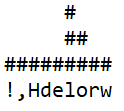

Example 2

**<u>Input**

Twas brillig, and the slithy toves

Did gyre and gimble in the wabe;

All mimsy were the borogoves,

And the mom raths outgrabe.

**<u>Output**
    
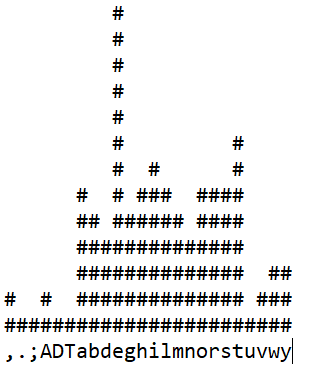

In [4]:
f = input()
dict = {}
mx = 1
for line in f:
    b = line.split()
    b = ''.join(b)
    line = b
    for c in line:
        if c in dict:
            dict[c] += 1
            mx = max(mx, dict[c])
        else:
            dict[c] = 1
s = ""
for i in dict:
    s += i
s = sorted(s)
for i in range(mx):
    str = ''
    for i in s:
        if dict[i] >= mx:
            str += '#'
        else:
            str += ' '
    print(str)
    mx -= 1
print(*s, sep="")

Hello world!
    #   
    ##  
########
!Hdelorw


# **Task 2. Beautiful line**

*The beauty of a string is the maximum number of consecutive identical letters. (The beauty of the string abcaabdddettq is 3)*

*Make the given string as pretty as possible if you can do at most k character replacement operations.*

**<u>Input Format**

*The first line contains one integer k (0 ≤ k ≤ 109)*

*The second line contains a non-empty string S (|S| ≤ 2 ⋅ 105). The line S consists only of small Latin letters.*

**<u>Output Format**

*Print one number — the maximum possible beauty of the line that can be obtained.*

Example 1

**<u>Input**

2

abcaz

**<u>Output**

4

Example 2

**<u>Input**

2

helto

**<u>Output**

3

In [5]:
def maxBeauty(s, k):
    n = len(s)
    left = right = 0
    freq = [0]*26
    max_freq = 0
    max_beauty = 1

    while right < n:
        freq[ord(s[right])-ord('a')] += 1
        max_freq = max(max_freq, freq[ord(s[right])-ord('a')])

        if right - left + 1 - max_freq > k:
            freq[ord(s[left])-ord('a')] -= 1
            left += 1

        max_beauty = max(max_beauty, right - left + 1)
        right += 1

    return max_beauty

k = int(input().strip())
s = input().strip()

print(maxBeauty(s, k))

4
helloworld
7


# **Task 3. Collector Diego**

*Diego enjoys collecting stickers. Each of them has a number written on it, and every collector dreams of collecting stickers with all the numbers encountered.*

*Diego has collected N stickers, some of which may be the same. Once K collectors came to him. The i-th of them collected all stickers with numbers not less than pi. Write a program to help each collector determine how many missing stickers Diego has. Of course, Diego's guests are not interested in repeated copies of the stickers.*

**<u>Input Format**

*The first line contains a single integer N (0 ≤ N ≤ 100000) — the number of stickers Diego has.*

*The next line contains N non-negative integers (not necessarily different) — the numbers of Diego's stickers. All sticker numbers do not exceed 109.*

*The next line contains the number K (0 ≤ K ≤ 100000) — the number of collectors who came to Diego. The next line contains K integers pi (0 ≤ pi ≤ 109), where pi is the smallest sticker number not of interest to the i-th collector.*

**<u>Output Format**

*For each collector print on a separate line the number of different numbers on the stickers that Diego has but this collector does not.*

Example 1

**<u>Input**

1

5

2

4 6

**<u>Output**

0

1

Example 2

**<u>Input**

3

100 1 50

3

300 0 75

**<u>Output**

3

0

2

In [6]:
d = int(input())
dn = sorted(set(map(int, input().split())))

k = int(input())
kn = map(int, input().split())

def bin_search(array, target):
    left = 0
    right = len(array) - 1

    while left <= right:
        mid = (left + right) // 2

        if array[mid] == target:
            return mid
        elif array[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return left

for j in kn:
    print(bin_search(dn, j))

3
100 1 50
3
300 0 75
3
0
2


# **Task 4. Test**

*Petya and Vasya are classmates and best friends, so they help each other in everything. Tomorrow they have a math test, and the teacher has prepared as many as K options for tasks.*

*There is one row of desks in the class, exactly two students will sit behind each of them (except, perhaps, the last one) on the control. Pupils know that the options will be distributed strictly in order: the right student of the first desk relative to the teacher will receive option 1, the left student will receive option 2, the right student of the second desk will receive option 3 (if the number of options is more than two), etc. Since K may be less than the number of students N, after option K, option 1 is given again. On the last desk, in case of an odd number of students, only place 1 is used.*

*Petya was the first to enter the classroom and sat down in his favorite seat. Vasya followed him in and wants to get the same option as Petya, while sitting as close to him as possible. That is, between them there should be as few desks as possible, and if there are two such places with an equal distance from Petya, Vasya will sit behind Petya, and not in front of him. Write a program that will tell Vasya which row and which place (to the right or left of the teacher) he should choose. If Vasya and Petya cannot write the same variant, then print one number  - 1.*

**<u>Input Format**

*The first line of the input contains the number of students in the class 2 ≤ N ≤ 109. The second line contains the number of tasks prepared for the control options 2 ≤ K ≤ N. The third line contains the number of the row Petya has already sat on, the fourth line contains the number 1 , if he sat down on the right seat, and 2, if on the left.*

**<u>Output Format**

*If Vasya cannot write the same variant as Petya, then print  -  1. If the solution exists, then print two numbers — the number of the row where Vasya should sit, and 1 if he should sit on the right seat, or 2 if to the left. It is allowed to use only the first N places in the order of distribution of options.*

Example 1

**<u>Input**

25

2

1

2

**<u>Output**

2 2

Example 2

**<u>Input**

25

13

7

1

**<u>Output**

-1

In [13]:
n = int(input())
k = int(input()) 
p_row = int(input()) 
p_seat = int(input()) 

num_desks = (n - 1) // 2
if n % 2 == 0:
    left_desks = num_desks
    right_desks = num_desks
else:
    if p_seat == 1:
        left_desks = num_desks
        right_desks = num_desks + 1
    else:
        left_desks = num_desks + 1
        right_desks = num_desks

if p_row <= (n + 1) // 2:
    r = p_row + left_desks
else:
    r = p_row - right_desks

if r < 1 or r > (n + 1) // 2:
    print("-1")
else:
    if p_seat == 1:
        s = 2
    else:
        s = 1
    print(r, s)

25
13
7
1
-1


# **Task 5. Good String**

*For his birthday, little Ippolit received a long-awaited gift - a set of boards with letters of the Latin alphabet written on them. Now he will have something to do for long evenings, especially since his mother promised to give him a sequence of non-negative integers next year if he masters this set well. For the sake of such wealth, Ippolit is ready for a lot.*

*Right now, the young researcher is completely absorbed in studying the goodness of the lines. The goodness of a string is the number of positions from 1 to L - 1 (where L is the length of the string) such that the next letter in the string is the next in the alphabet. For example, the goodness of the string "abcdefghijklmnopqrstuvwxyz" is 25, while the string "abdc" is only 1.*

*Hippolyte reflects on the solution of a naturally occurring problem: what is the maximum possible goodness of a line that can be assembled using the boards from the given set? You will help him deal with it.*

**<u>Input Format**

*The first input line contains a single integer N — the number of different letters in the set (1 ≤ N ≤ 26). Please note: the first N letters of the Latin alphabet are always used in the set.*

*The next N lines contain positive integers ci — the number of letters of the corresponding type (1 ≤ ci ≤ 109). Thus, the first number indicates the number of "a" letters, the second number specifies the number of "b" letters, and so on.*

**<u>Output Format**

*Print a single integer — the maximum possible goodness of a string that can be assembled from the available boards.*

Example 1

**<u>Input**

3

1

1

1

**<u>Output**

2

Example 2

**<u>Input**

2

3

4

**<u>Output**

3

In [7]:
n = int(input())
d = []
for i in range(n):
    m = int(input())
    d.append(m)
  
s = 0
for i in range(n-1):
    s += min(d[i], d[i + 1])
print(s)

2
3
4
3


# **Task 6. Operating systems Lite**

*Vasya's hard disk consists of M sectors. Vasya sequentially installed various operating systems on it in the following way: he created a new disk partition from successive sectors, starting from sector number ai and up to sector bi inclusive, and installed the next system on it. At the same time, if the next partition in at least one sector intersects with some previously created partition, then the previously created partition is “overwritten”, and the operating system that was installed on it can no longer be loaded.*

*Write a program that, based on information about which partitions Vasya created on the disk, will determine how many functional operating systems are installed and running on Vasya's computer at the moment.*

**<u>Input Format**

*First, a natural number M is entered — the number of sectors on the hard disk (1 ≤ M ≤ 109) and an integer N — the number of partitions that Vasya created sequentially (0 ≤ N ≤ 1000).*

*Then there are N pairs of numbers ai and bi, specifying the numbers of the initial and final sectors of the partition (1 ≤ ai ≤ bi ≤ M).*

**<u>Output Format**

*Print a single number — the number of running operating systems on Vasya's computer.*

Example 1

**<u>Input**

10

3

13

4 7

3 4

**<u>Output**

1

Example 2

**<u>Input**

10

4

1 3

4 5

7 8

4 6

**<u>Output**

3

In [8]:
m = int(input())
n = int(input())
partitions = []

for i in range(n):
    a, b = map(int, input().split())
    partitions.append((a, b))

count = n

for i in range(n):
    for j in range(i+1, n):
        if partitions[i][1] >= partitions[j][0] and partitions[j][1] >= partitions[i][0]:
            count -= 1
            break
print(count)

10
4
1 3
4 5
7 8
4 6
3


# **Task 7. SNTP**

*In order for computers to maintain up-to-date time, they can access SNTP (Simple Network Time Protocol) time servers. Unfortunately, the computer cannot simply get the time from the server, because information is not transmitted over the network instantly: until the message with the current time reaches the computer, it will lose its relevance. The protocol of interaction between the client (the computer requesting the exact time) and the server (the computer giving the exact time) is as follows:*

*1. The client sends a request to the server and remembers the departure time A (client time).*

*2. The server receives the request at time B (exact server time) and sends a message to the client containing time B.*

*3. The client receives a response to its request at time C (client time) and remembers it. Now the client, under the assumption that the network delays in the transmission of messages from the client to the server and from the server to the client are the same, can determine and set the exact time for itself using the known values of A, B, C.*

*You have to implement an algorithm that, to the nearest second, determines the exact time to install on the client using known A, B, and C. If necessary, round the result to an integer number of seconds according to the rules of arithmetic (down if the fractional part of the number is less than 1/2, otherwise to the big side).*

*It is possible that while the client was waiting for a response, a new day had come in client time, but it is known that less than 24 hours elapsed between the client sending a request and receiving a response from the server.*

**<u>Input Format**

*The program receives as input three timestamps A, B, C, one in each line. All timestamps are in the format hh:mm:ss, where hh is hours, mm is minutes, and ss is seconds. Hours, minutes, and seconds are written with exactly two digits each (possibly with extra leading zeros).*

**<u>Output Format**

*The program should output a single timestamp in the format described in the input, the computed exact time to set on the client. There should be no spaces in the output, empty lines at the beginning of the output.*

Example

**<u>Input**

15:01:00

18:09:45

15:01:40

**<u>Output**

18:10:05

In [9]:
def timestamp_to_time(timestamp):
    seconds = 0
    for token in timestamp.split(":"):
        seconds = seconds * 60 + int(token)
    return seconds
 
def time_to_timestamp(time):
    seconds = time % 60
    time //= 60
    minutes = time % 60 
    time //= 60
    hours = time % 24
    return "{:02d}:{:02d}:{:02d}".format(hours, minutes, seconds)
 
A = timestamp_to_time(input())
B = timestamp_to_time(input())
C = timestamp_to_time(input())
 
if C < A:
    C += timestamp_to_time("24:00:00")
 
t = (C - A + 1) // 2
current_time = B + t
print(time_to_timestamp(current_time))

15:01:00
18:09:45
15:01:40
18:10:05


# **Task 8. Minimal Rectangle**

*K cells are shaded on the checkered plane. It is required to find a rectangle with the minimum area, with sides parallel to the grid lines, covering all the shaded cells.*

**<u>Input Format**

*In the input file, on the first line, there is a number K (1 ≤ K ≤ 100). The next K lines contain pairs of numbers Xi and Yi, the coordinates of the filled cells (|Xi|, |Yi| ≤ 109).*

**<u>Output Format**

*Output the coordinates of the lower left and upper right corners of the rectangle to the output file.*

Example

**<u>Input**

3

1 1

1 10

5 5

**<u>Output**

1 1 5 10

In [10]:
n = int(input())
d = []
g = []
for i in range(n):
    m = input().split()
    a = m[0]
    b = m[1]
    d.append(int(a))
    g.append(int(b))

print(min(d), min(g), max(d), max(g))

3
1 1
1 10
5 5
1 1 5 10


# **Task 9. Sum in a rectangle**

*You need to answer queries to find out the sum of all elements of the N × M numerical matrix in a rectangle with the upper left corner (x1, y1) and the lower right (x2, y2)*

**<u>Input Format**

*The first line contains the numbers N, M the size of the matrix (1 ≤ N, M ≤ 1000) and K the number of requests (1 ≤ K ≤ 100000). Each of the following N lines contains M numbers — elements of the corresponding row of the matrix (modulo does not exceed 1000). The next K lines contain 4 space-separated integers x1 y1 x2 y2 — query for the sum of elements of the matrix in the rectangle (1 ≤ x1 ≤ x2 ≤ N, 1 ≤ y1 ≤ y2 ≤ M)*

**<u>Output Format**

*For each query, print its result on a separate line — the sum of all numbers in the matrix elements in the rectangle (x1, y1), (x2, y2)*

Example

**<u>Input**

3 3 2

1 2 3

4 5 6

7 8 9

2 2 3 3

1 1 2 3

**<u>Output**

28

21

In [11]:
n, m, k = map(int, input().split())
matrix = []
for i in range(n):
    row = list(map(int, input().split()))
    matrix.append(row)

prefix_sum = [[0] * (m+1) for i in range(n+1)]
for i in range(1, n+1):
    for j in range(1, m+1):
        prefix_sum[i][j] = prefix_sum[i-1][j] + prefix_sum[i][j-1] - prefix_sum[i-1][j-1] + matrix[i-1][j-1]

q =[]
for i in range(k):
    x1, y1, x2, y2 = map(int, input().split())
    sum_of_rectangle = prefix_sum[x2][y2] - prefix_sum[x1-1][y2] - prefix_sum[x2][y1-1] + prefix_sum[x1-1][y1-1]
    q.append(sum_of_rectangle)

for j in q:
    print(j)

3 3 2
1 2 3
4 5 6
7 8 9
2 2 3 3
1 1 2 3
28
21


# **Task 10. Boring lecture**

*Lyosha was sitting at the lecture. He was incredibly bored. The lecturer's voice seemed so distant and imperceptible...*

*In order not to fall asleep completely, he took a piece of paper and wrote his favorite word on it. A little lower, he repeated his favorite word, without the first letter. Even lower, he again wrote his favorite word, but this time without the first and last two letters.*

*Then the thought occurred to him - there is still a lot of time until the end of the lecture, why not continue to write out this word in all possible ways without some part from the beginning and some part from the end?*

*After the lecture, Lyosha told Max how wonderfully he had passed the time. Max became interested in counting how many letters of each type are found in Lyosha's leaflet. But unfortunately, the leaf itself disappeared somewhere.*

*Max knows Lesha's favorite word well, and he also doesn't have as much free time as his friend, so help him quickly recover how many times Lesha had to write down each letter.*

**<u>Input Format**

*The input is a string consisting of lowercase Latin letters - Lesha's favorite word.*

*The string length ranges from 5 to 100,000 characters.*

**<u>Output Format**

*For each letter on Lyosha's piece of paper, print it, and then, separated by a colon and a space, how many times it occurs in the words Lesha wrote out (see the output format in the examples). The letters must be in alphabetical order. Letters that do not appear on the sheet do not need to be displayed.*

Example 1

**<u>Input**

hello

**<u>Output**

e:8

h:5

l:17

o:5

Example 2

**<u>Input**

abacaba

**<u>Output**

a:44

b:24

c:16

In [12]:
n = input()
t = {}
for i, j in enumerate(n, 1):
    s = i * (len(n) - i + 1)
    if j not in t:
        t[j] = s
    else:
        t[j] += s
for key, value in sorted(t.items()):
    print(f"{key}: {value}")

hello
e: 8
h: 5
l: 17
o: 5
